In [1]:
# Importando pandas e recebendo os dados
import pandas as pd

url = 'https://raw.githubusercontent.com/bluenex/WekaLearningDataset/master/bank/bank-data.csv'
df = pd.read_csv(url)

# Verificando se os dados foram importados corretamente
df.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [2]:
# Informações gerais sobre o dataset
print(df.info())

# Descrição estatística do dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB
None


,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [3]:
# Verificando pep
print(df['pep'].value_counts())

pep
NO     326
YES    274
Name: count, dtype: int64


In [4]:
# Substituindo os Dtype object por int64
df.replace({'NO': 0, 'YES': 1}, inplace=True)
df['sex'].replace({'FEMALE': 0, 'MALE': 1}, inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11832\1841180697.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'NO': 0, 'YES': 1}, inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_11832\1841180697.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].replace({'FEMALE': 0

In [5]:
# Substituindo os dados de region por int64
# Contagem para cada tipo de regiao
contagem = {
    'INNER_CITY' : 0,
    'TOWN' : 0,
    'RURAL' : 0,
    'SUBURBAN' : 0
}

for val in df['region']:
  if val == 'INNER_CITY':
    contagem['INNER_CITY'] += 1
  if val == 'TOWN':
    contagem['TOWN'] += 1
  if val == 'RURAL':
    contagem['RURAL'] += 1
  if val == 'SUBURBAN':
    contagem['SUBURBAN'] += 1

print(contagem)


{'INNER_CITY': 269, 'TOWN': 173, 'RURAL': 96, 'SUBURBAN': 62}


In [6]:
# Ajustando region de acordo com a quantidade de vezes que aparece
df['region'].replace({'INNER_CITY': 3, 'TOWN': 2, 'RURAL': 1, 'SUBURBAN': 0}, inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11832\262663527.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region'].replace({'INNER_CITY': 3, 'TOWN': 2, 'RURAL': 1, 'SUBURBAN': 0}, inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_11832\262663527.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

In [7]:
# Removendo id por ser só um identificador
df.drop(columns=['id'], inplace=True)

In [8]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          600 non-null    int64  
 1   sex          600 non-null    int64  
 2   region       600 non-null    int64  
 3   income       600 non-null    float64
 4   married      600 non-null    int64  
 5   children     600 non-null    int64  
 6   car          600 non-null    int64  
 7   save_act     600 non-null    int64  
 8   current_act  600 non-null    int64  
 9   mortgage     600 non-null    int64  
 10  pep          600 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 51.7 KB
None


,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,42.395000,0.500000,2.081667,27524.031217,0.660000,1.011667,0.493333,0.690000,0.758333,0.348333,0.456667
std,14.424947,0.500417,1.008311,12899.468246,0.474104,1.056752,0.500373,0.462879,0.428451,0.476840,0.498534
min,18.000000,0.000000,0.000000,5014.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,17264.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,42.000000,0.500000,2.000000,24925.300000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,55.250000,1.000000,3.000000,36172.675000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,1.000000,3.000000,63130.100000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [87]:
# Importando bibliotecas para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

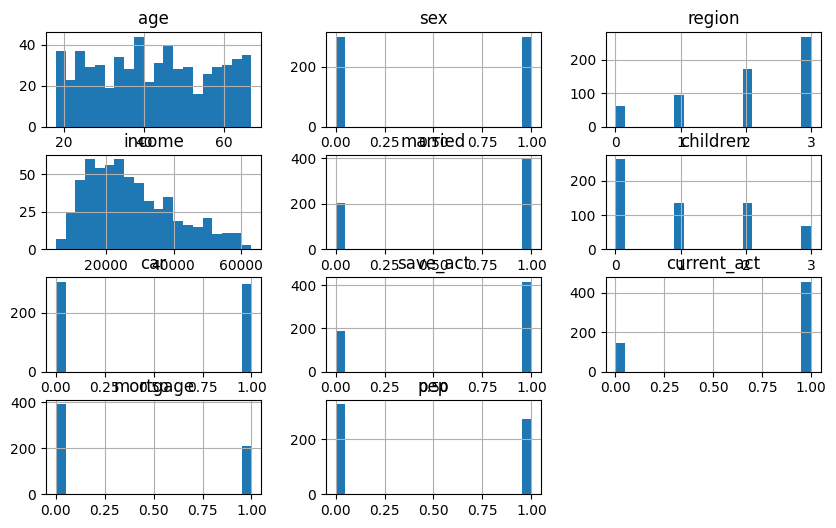

In [88]:
# Exibindo o histograma dos dados
df.hist(figsize=(10, 6), bins=20)
plt.show()

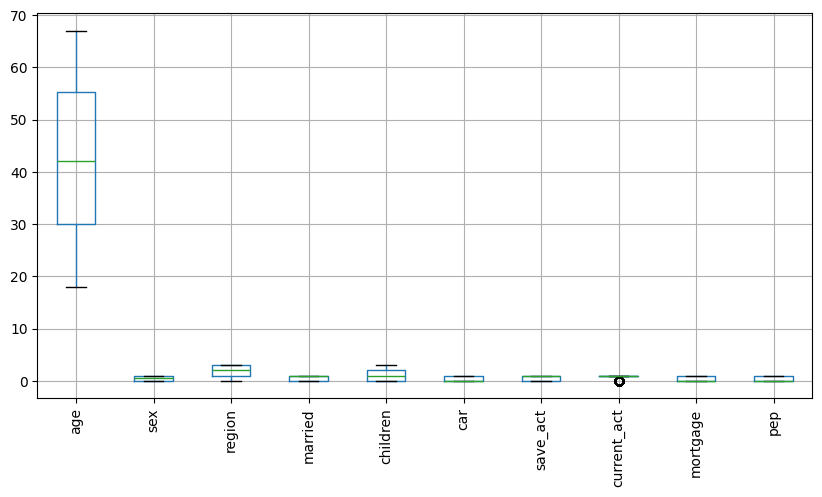

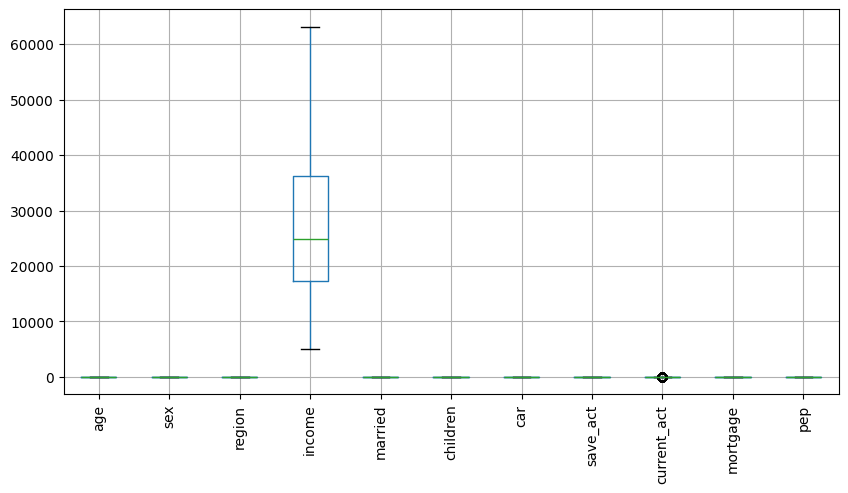

In [89]:
# Exibindo boxplot dos dados
df.drop(columns=['income']).boxplot(figsize=(10, 5), rot=90)
plt.show()

df.boxplot(figsize=(10, 5), rot=90)
plt.show()

<Axes: title={'center': 'Pearson Correlation of Features'}>

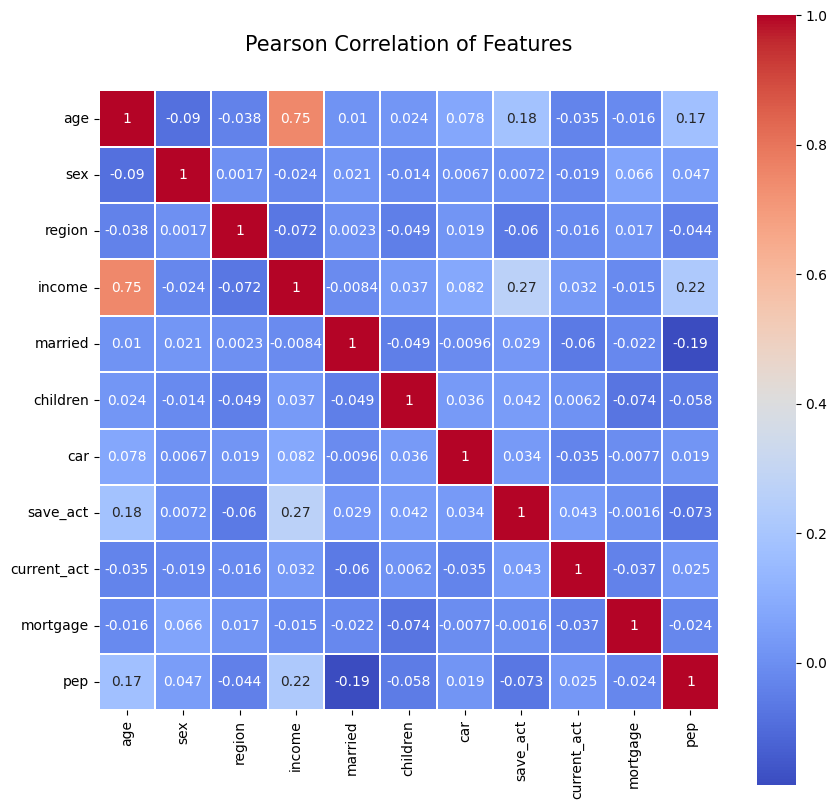

In [90]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [91]:
#Excluindo variáveis que podem influenciar o resultado de maneira errada a partir de uma análise realista do problema
colunas = ['car']
df.drop(columns=colunas, inplace=True)

In [92]:
# Informações gerais sobre o dataset atualizado
print(df.info())

# Descrição estatística do dataset atualizado
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          600 non-null    int64  
 1   sex          600 non-null    int64  
 2   region       600 non-null    int64  
 3   income       600 non-null    float64
 4   married      600 non-null    int64  
 5   children     600 non-null    int64  
 6   save_act     600 non-null    int64  
 7   current_act  600 non-null    int64  
 8   mortgage     600 non-null    int64  
 9   pep          600 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 47.0 KB
None


,age,sex,region,income,married,children,save_act,current_act,mortgage,pep
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,42.395000,0.500000,2.081667,27524.031217,0.660000,1.011667,0.690000,0.758333,0.348333,0.456667
std,14.424947,0.500417,1.008311,12899.468246,0.474104,1.056752,0.462879,0.428451,0.476840,0.498534
min,18.000000,0.000000,0.000000,5014.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,17264.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,42.000000,0.500000,2.000000,24925.300000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,55.250000,1.000000,3.000000,36172.675000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,1.000000,3.000000,63130.100000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
# Preparando para o treinamento do Dataset com os algorítmos de Machine Learning de classificação
y = df['pep']
X = df.drop('pep', axis=1)

In [94]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [134]:
# Criação de dados sintéticos para equilibrar a distribuição de classes no conjunto de dados
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=47)
X_res, y_res = smote.fit_resample(X, y)

In [148]:
from sklearn.model_selection import train_test_split

# Assumindo que o x é o feature set e o y é a target variable
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3)

In [149]:
from sklearn.preprocessing import StandardScaler
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
# Bibliotecas para métricas
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [151]:
def mostrar_curva_ROC(modelo):
    # Prever as probabilidades para os dados de teste.
    # Estamos interessados nas probabilidades da classe positiva (1), então usamos [:, 1].
    y_probs = modelo.predict_proba(X_test)[:, 1]

    # Calcular FPR, TPR, e limiares
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Calcular a AUC
    roc_auc = auc(fpr, tpr)

    # Plotar a curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [152]:
def mostrar_matriz_de_confusao(y_pred):
    # Matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusão:")
    print(conf_matrix)
    print("\n")

In [160]:
# Função para mostrar métricas
def mostrar_metricas(modelo):
    y_pred = modelo.predict(X_test)

    acuracia = modelo.score(X_test, y_test)
    precisao = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Acurácia: ", acuracia)
    print("Precisão: ", precisao)
    print("Recall:   ", recall)
    print("F1-score: ", f1)
    print("\n")

    mostrar_matriz_de_confusao(y_pred)

    mostrar_curva_ROC(modelo)

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC



Modelo: Logistic Regression

Acurácia:  0.6275510204081632
Precisão:  0.66
Recall:    0.6285714285714286
F1-score:  0.6439024390243903


Matriz de Confusão:
[[57 34]
 [39 66]]




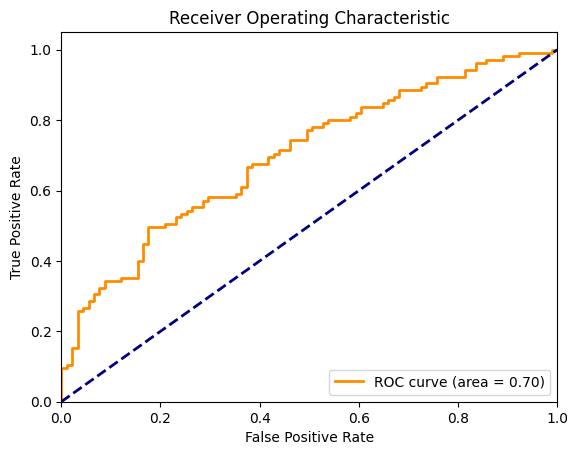



Modelo: Decision Tree Classifier

Acurácia:  0.8775510204081632
Precisão:  0.8584070796460177
Recall:    0.9238095238095239
F1-score:  0.8899082568807339


Matriz de Confusão:
[[75 16]
 [ 8 97]]




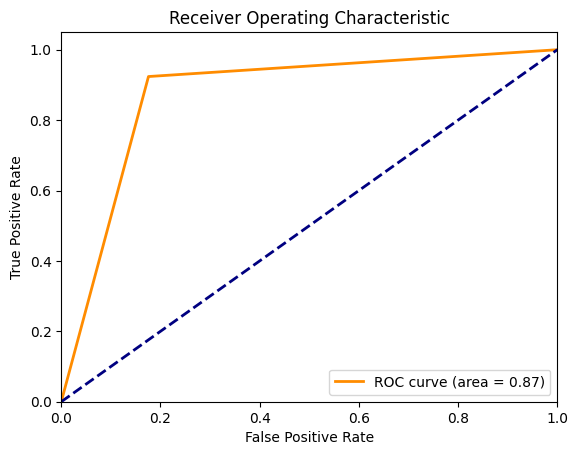



Modelo: Random Forest Classifier

Acurácia:  0.8979591836734694
Precisão:  0.9292929292929293
Recall:    0.8761904761904762
F1-score:  0.9019607843137255


Matriz de Confusão:
[[84  7]
 [13 92]]




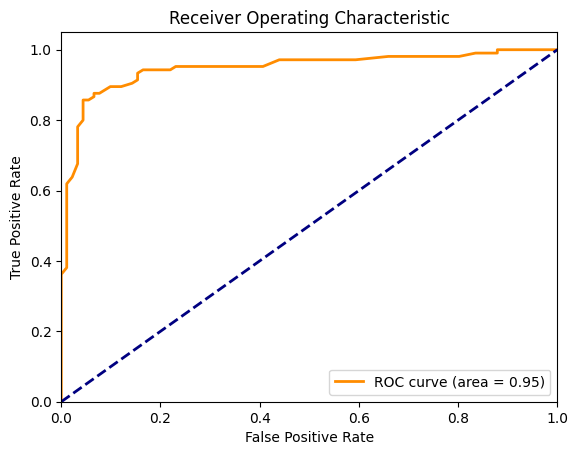



Modelo: Extra Trees Classifier

Acurácia:  0.8928571428571429
Precisão:  0.9038461538461539
Recall:    0.8952380952380953
F1-score:  0.8995215311004785


Matriz de Confusão:
[[81 10]
 [11 94]]




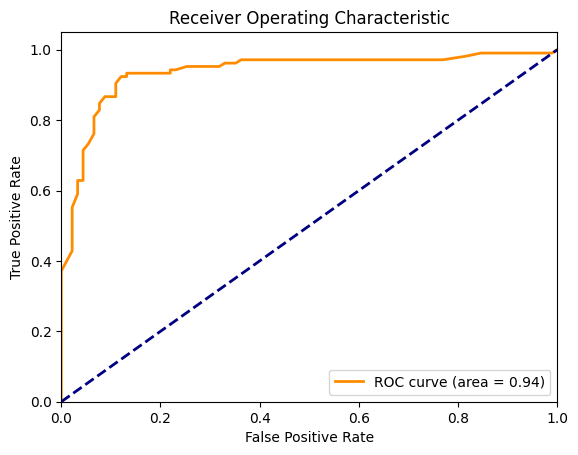



Modelo: K-Neighbors Classifier

Acurácia:  0.7448979591836735
Precisão:  0.7619047619047619
Recall:    0.7619047619047619
F1-score:  0.7619047619047619


Matriz de Confusão:
[[66 25]
 [25 80]]




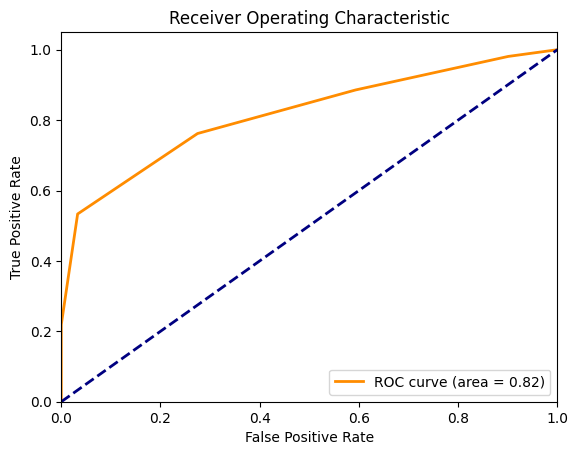



Modelo: SVC

Acurácia:  0.8214285714285714
Precisão:  0.8977272727272727
Recall:    0.7523809523809524
F1-score:  0.8186528497409327


Matriz de Confusão:
[[82  9]
 [26 79]]




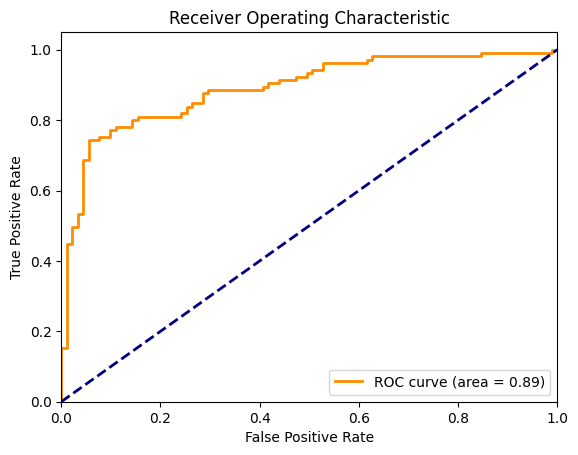



Modelo: Bernoulli NB

Acurácia:  0.6785714285714286
Precisão:  0.7142857142857143
Recall:    0.6666666666666666
F1-score:  0.6896551724137931


Matriz de Confusão:
[[63 28]
 [35 70]]




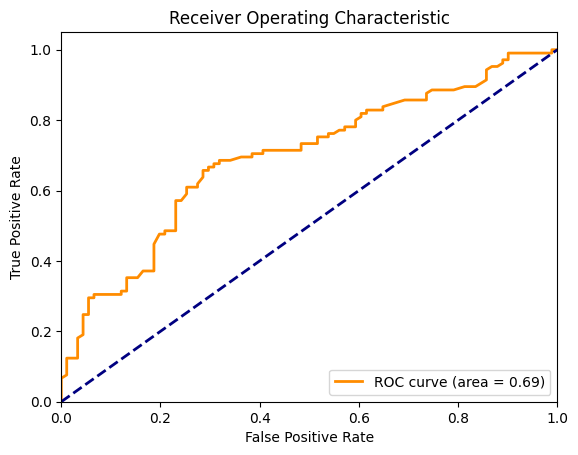

In [167]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
print("\n\nModelo: Logistic Regression\n")
mostrar_metricas(lr)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
print("\n\nModelo: Decision Tree Classifier\n")
mostrar_metricas(dtc)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
print("\n\nModelo: Random Forest Classifier\n")
mostrar_metricas(rfc)

etc = ExtraTreesClassifier(random_state=42)
etc.fit(X_train, y_train)
print("\n\nModelo: Extra Trees Classifier\n")
mostrar_metricas(etc)

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
print("\n\nModelo: K-Neighbors Classifier\n")
mostrar_metricas(knc)

svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)
print("\n\nModelo: SVC\n")
mostrar_metricas(svc)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
print("\n\nModelo: Bernoulli NB\n")
mostrar_metricas(bnb)

In [168]:
# Começando a otimizar o algorítmo do Random Forest Classifier já que foi o que teve os melhores resultados

In [169]:
# Baixando biblioteca para fazer o BayesSearch
%pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [170]:
# Importando biblioteca bara BayesSearch, RandomizedSearch e GridSearch
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [175]:
# Parâmetros para a otimização

# Para RandomizedSearchCV
param_random = {
    'max_depth': [None, 10, 20],
    'n_estimators': [20, 50, 100],
    'min_samples_split': [2 , 5, 10]
}

# Para GridSearchCV
param_grid = {
    'n_estimators' : [20, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Para BayesSearchCV
param_space = {
    'n_estimators': (20, 100),
    'max_depth': (1, 20),
    'min_samples_split': (2, 10)
}





Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(




Modelo: RFC - Randomized Search

Acurácia:  0.8826530612244898
Precisão:  0.9019607843137255
Recall:    0.8761904761904762
F1-score:  0.8888888888888888


Matriz de Confusão:
[[81 10]
 [13 92]]




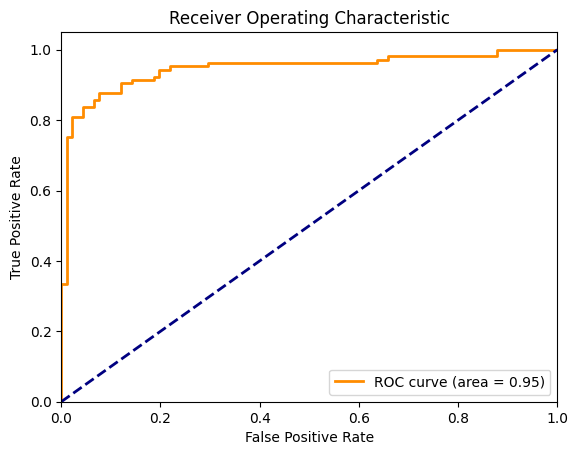







Modelo: RFC - Grid Search

Acurácia:  0.8826530612244898
Precisão:  0.9019607843137255
Recall:    0.8761904761904762
F1-score:  0.8888888888888888


Matriz de Confusão:
[[81 10]
 [13 92]]




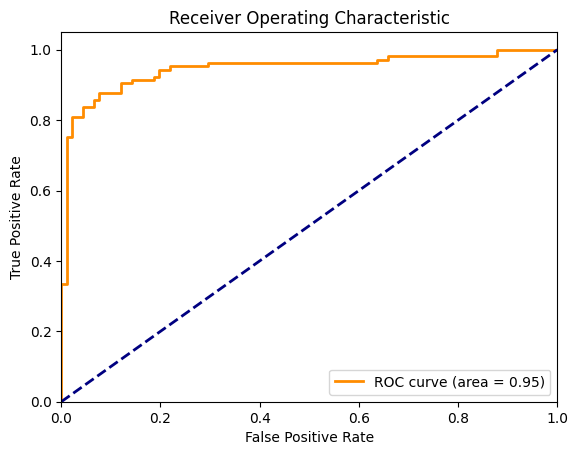

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [16, 2, 100] before, using random point [17, 7, 32]
  warnings.warn(




Modelo: RFC - Bayes Search

Acurácia:  0.8775510204081632
Precisão:  0.9090909090909091
Recall:    0.8571428571428571
F1-score:  0.8823529411764706


Matriz de Confusão:
[[82  9]
 [15 90]]




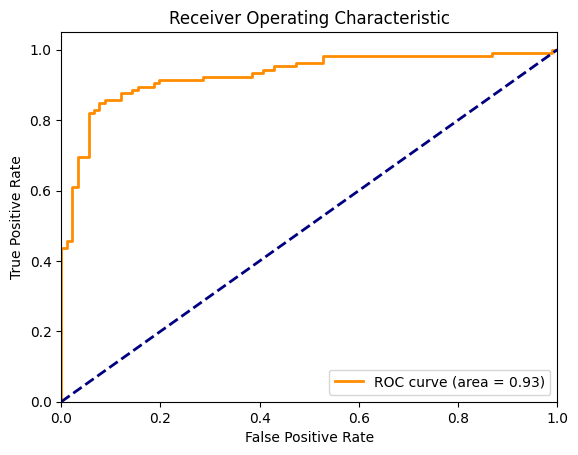





CPU times: total: 1min 22s
Wall time: 1min 26s


In [176]:
%%time

print("\n\n\n")

rfc_randomized_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_random, n_iter=50, cv=5, verbose=1)
rfc_randomized_search.fit(X_train, y_train)
print("\n\nModelo: RFC - Randomized Search\n")
mostrar_metricas(rfc_randomized_search)

print("\n\n\n")

rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
rfc_grid_search.fit(X_train, y_train)
print("\n\nModelo: RFC - Grid Search\n")
mostrar_metricas(rfc_grid_search)

print("\n\n\n")

rfc_bayes_search = BayesSearchCV(estimator=rfc, search_spaces=param_space, cv=5, n_iter=50, random_state=42)
rfc_bayes_search.fit(X_train, y_train)
print("\n\nModelo: RFC - Bayes Search\n")
mostrar_metricas(rfc_bayes_search)

print("\n\n\n")
